# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(merged_data["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_ID = merged_data.loc[duplicate_mice, 'Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
compiled_duplicates = merged_data.loc[merged_data['Mouse ID']==duplicate_mice_ID[0]]
compiled_duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
reduced_df = merged_data.drop(compiled_duplicates.index)
reduced_df.to_csv('data/clean_data.csv', index=False, header=True)

In [9]:
# Checking the number of mice in the clean DataFrame.
reduced_mice = len(reduced_df["Mouse ID"].unique())
reduced_mice

248

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen = reduced_df.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = drug_regimen['Tumor Volume (mm3)'].mean()
median = drug_regimen['Tumor Volume (mm3)'].median()
var = drug_regimen['Tumor Volume (mm3)'].var()
std = drug_regimen['Tumor Volume (mm3)'].std()
sem = drug_regimen['Tumor Volume (mm3)'].sem()
summary_series_df = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': var,
    'Standard Deviation': std,
    'SEM': sem
})

print('Series I')
summary_series_df


Series I


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [13]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_statistics_df = drug_regimen['Tumor Volume (mm3)'].agg(['mean', 'var', 'median', 'std', 'sem', 'count'])
summary_statistics_df

,mean,var,median,std,sem,count
Drug Regimen,,,,,,
Capomulin,40.675741,24.947764,41.557809,4.994774,0.329346,230
Ceftamin,52.591172,39.290177,51.776157,6.268188,0.469821,178
Infubinol,52.884795,43.128684,51.820584,6.567243,0.492236,178
Ketapril,55.235638,68.553577,53.698743,8.279709,0.603860,188
Naftisol,54.331565,66.173479,52.509285,8.134708,0.596466,186
Placebo,54.033581,61.168083,52.288934,7.821003,0.581331,181
Propriva,52.320930,43.852013,50.446266,6.622085,0.544332,148
Ramicane,40.216745,23.486704,40.673236,4.846308,0.320955,228
Stelasyn,54.233149,59.450562,52.431737,7.710419,0.573111,181


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

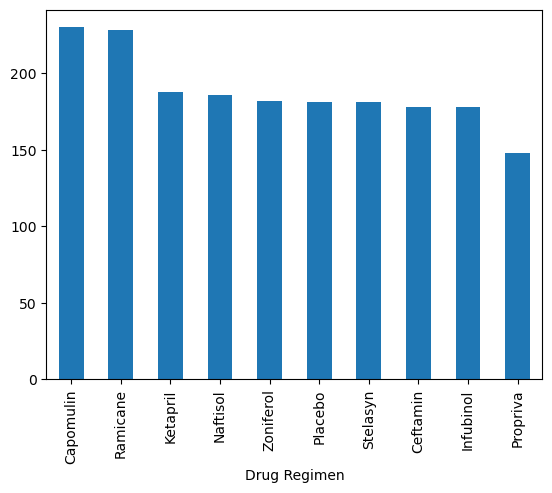

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoint_count = drug_regimen['Timepoint'].count().sort_values(ascending=False)
timepoint_count.plot.bar(x='Drug Regimen', y='# of Observed Mice Timeoints')

In [ ]:
timepoint_count.index

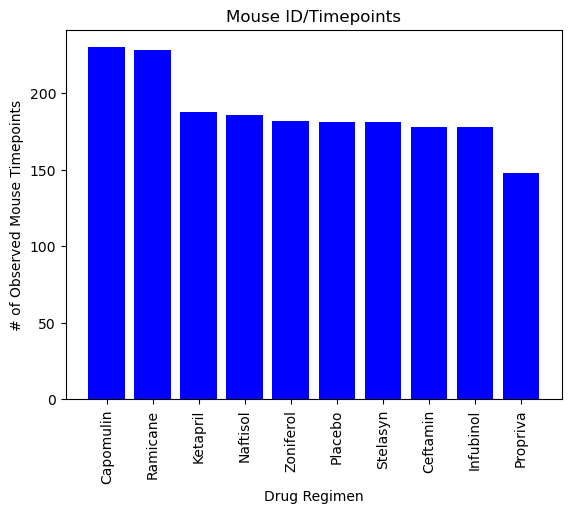

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(timepoint_count.index,timepoint_count.values, color='blue')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse ID/Timepoints")
plt.xticks(rotation='vertical')
plt.show()

<Axes: ylabel='Sex'>

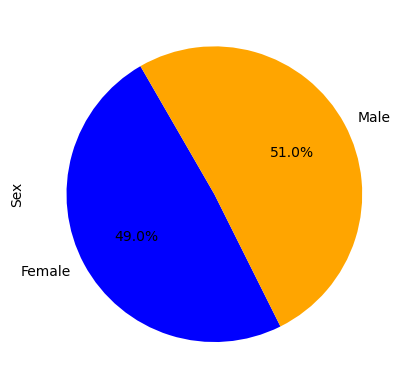

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = reduced_df.groupby('Sex')['Sex'].count()
colors=['blue','orange']
mice_gender.plot.pie(autopct="%1.1f%%", startangle=120, colors=colors)

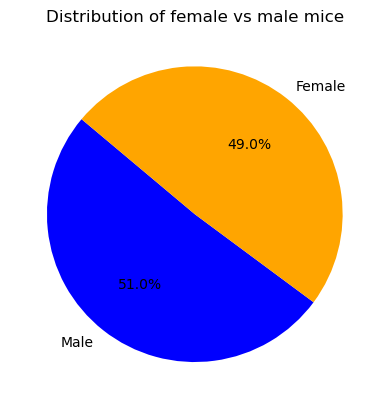

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count= reduced_df['Sex'].value_counts()
colors= ['blue','orange']
plt.pie(gender_count, labels=gender_count.index, autopct="%1.1f%%", startangle=140, colors=colors)
plt.title('Distribution of female vs male mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [31]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = reduced_df.groupby(["Mouse ID"])["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
timepoint_merge_df = last_timepoint.merge(reduced_df, on=["Mouse ID", "Timepoint"], how="left")
timepoint_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_lists=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    
    drug_series = timepoint_merge_df.loc[timepoint_merge_df["Drug Regimen"] == drug,"Tumor Volume (mm3)"]
    
    tumor_volume_lists.append(drug_series)
    quartiles = drug_series.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5*iqr)
    upper_bound = upper_q + (1.5*iqr)
    
    outliers = drug_series.loc[(drug_series<lower_bound) | (drug_series>upper_bound)]
    
    print(f"{drug}\'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


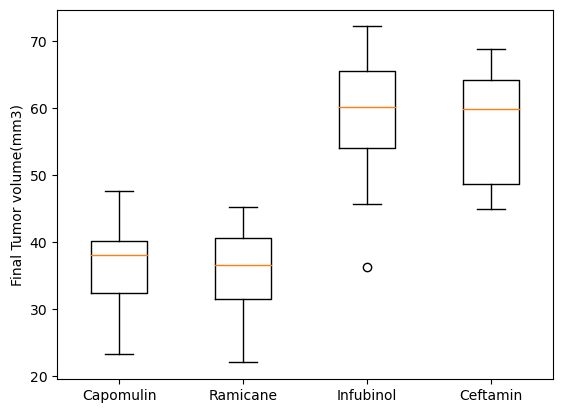

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_lists, labels=treatments)
plt.ylabel("Final Tumor volume(mm3)")
plt.show()

## Line and Scatter Plots

Text(0.5, 1.0, 'Tumor Volume for mouse s185 | Treatment: Campomulin')

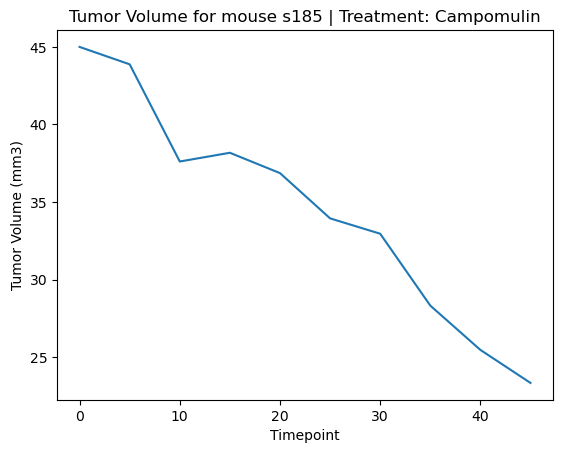

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_s185 = reduced_df[reduced_df["Mouse ID"] == 's185']
plt.plot(mouse_s185['Timepoint'],mouse_s185['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for mouse s185 | Treatment: Campomulin')

Text(0.5, 1.0, 'Average Tumor Volume vs Mouse Weight | Treatment: Capomulin')

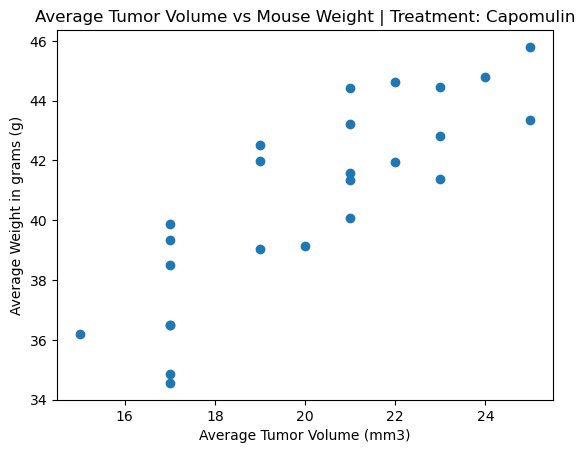

In [43]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = reduced_df[reduced_df['Drug Regimen'] == 'Capomulin']
avg_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
avg_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(avg_weight, avg_volume)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight in grams (g)')
plt.title('Average Tumor Volume vs Mouse Weight | Treatment: Capomulin')

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


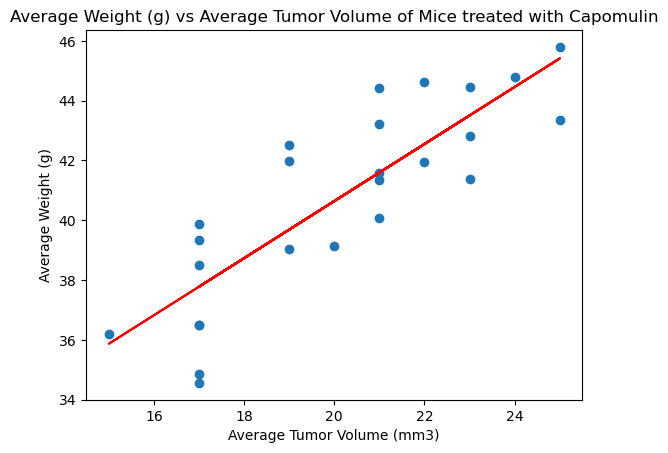

In [51]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
m_avg_tumor, int_avg_tumor, r_avg_tumor, p_avg_tumor, std_avg_tumor = st.linregress(avg_weight, avg_volume)

#plot lin regression
line_eq = m_avg_tumor*avg_weight+int_avg_tumor
plt.scatter(avg_weight, avg_volume)
plt.plot(avg_weight, line_eq, color='red')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight (g)')
plt.title('Average Weight (g) vs Average Tumor Volume of Mice treated with Capomulin')

print(f'The correlation between mouse weight and average tumor volume is {r_avg_tumor.round(2)}')